In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
146,28.0,4,90.0,75.0,2125,14.5,74,usa,dodge colt
282,22.3,4,140.0,88.0,2890,17.3,79,usa,ford fairmont 4
69,12.0,8,350.0,160.0,4456,13.5,72,usa,oldsmobile delta 88 royale
378,38.0,4,105.0,63.0,2125,14.7,82,usa,plymouth horizon miser
331,33.8,4,97.0,67.0,2145,18.0,80,japan,subaru dl
...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990,18.2,79,usa,mercury zephyr 6
229,16.0,8,400.0,180.0,4220,11.1,77,usa,pontiac grand prix lj
150,26.0,4,108.0,93.0,2391,15.5,74,japan,subaru
145,32.0,4,83.0,61.0,2003,19.0,74,japan,datsun 710


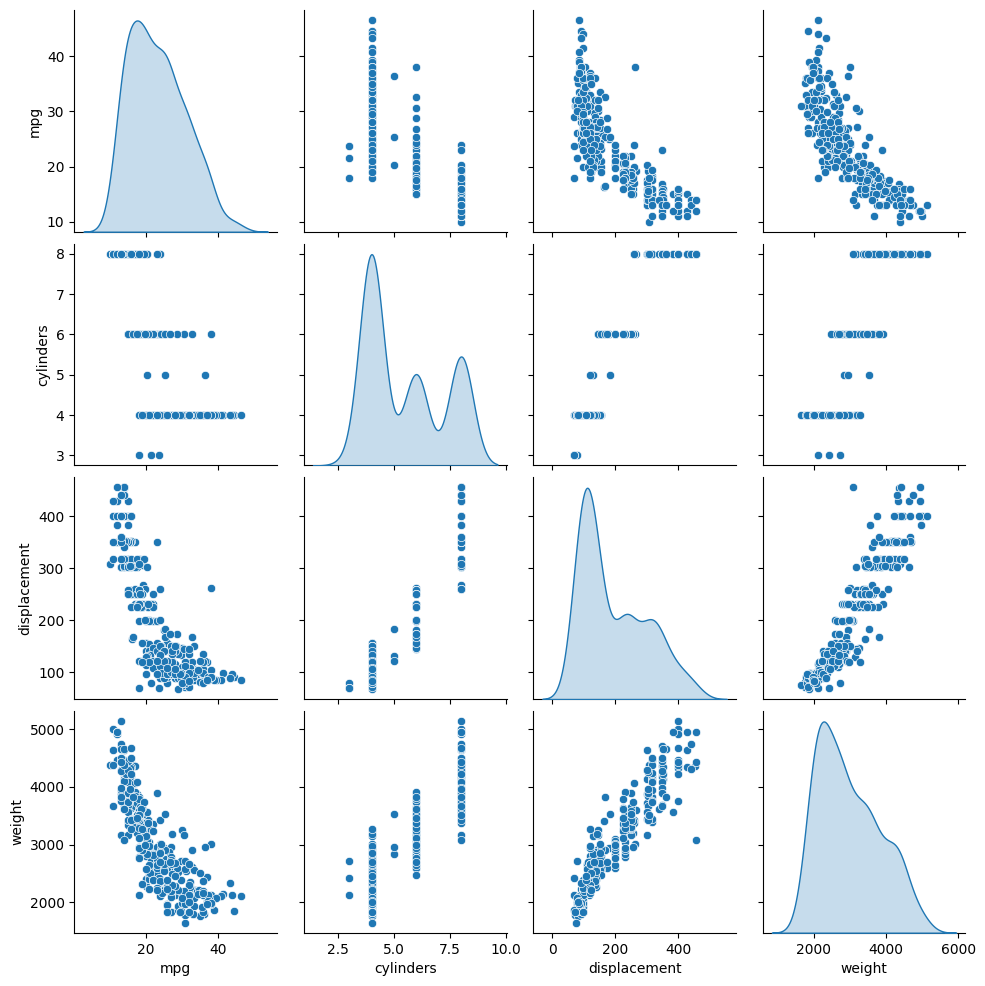

In [ ]:
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta,date
from scipy.stats import linregress
import statsmodels.api as sm

<class 'pandas.core.series.Series'>


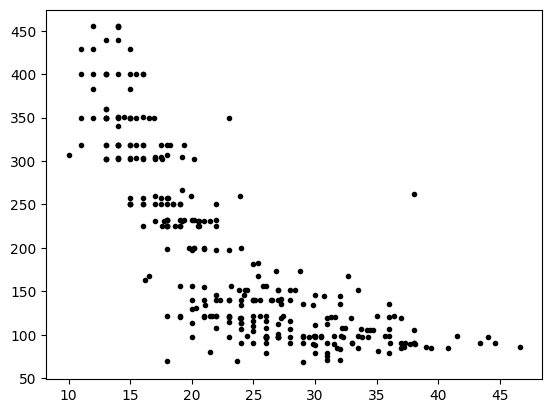

In [ ]:
Y = train_dataset['displacement']
X = train_dataset['mpg']
plt.plot(X,Y,'k.')
print(type(X))

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X.head()

,const,mpg
146,1.0,28.0
282,1.0,22.3
69,1.0,12.0
378,1.0,38.0
331,1.0,33.8


In [ ]:
model = sm.OLS(Y, X, missing='drop')

model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:           displacement   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     556.1
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.62e-71
Time:                        06:05:54   Log-Likelihood:                -1743.7
No. Observations:                 314   AIC:                             3491.
Df Residuals:                     312   BIC:                             3499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        447.1798     11.250     39.750      0.0

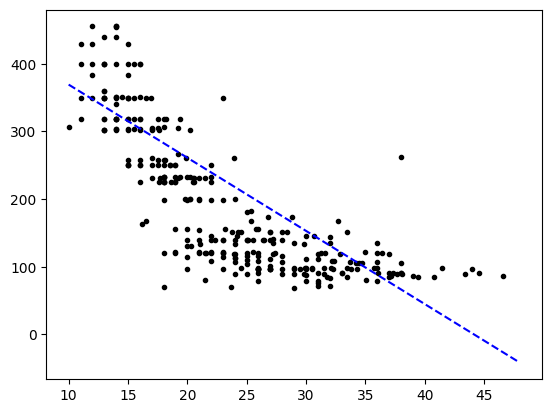

In [ ]:
xt = np.linspace(10,48,50)
Xt = train_dataset['mpg']

yt = xt*-10.8046+477.1798
plt.plot(Xt,Y,'k.')
plt.plot(xt,yt,'b--')

In [ ]:
from sklearn import svm, metrics
print(X.shape)
print(X)

(314, 2)
     const   mpg
146    1.0  28.0
282    1.0  22.3
69     1.0  12.0
378    1.0  38.0
331    1.0  33.8
..     ...   ...
281    1.0  19.8
229    1.0  16.0
150    1.0  26.0
145    1.0  32.0
182    1.0  28.0

[314 rows x 2 columns]


R-sqaure of SVR is  0.8017585387171895
It is better than simple regression (0.641)


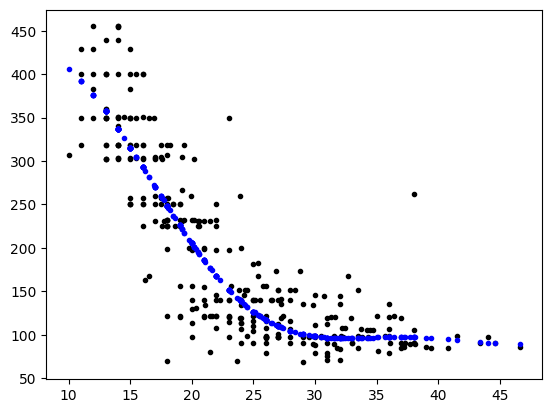

In [ ]:
svr_model = svm.SVR(C=100, epsilon=1, kernel='rbf')

# train the SVM model with training dataset.

svr_model.fit(X,Y)
#xt = sm.add_constant(xt)
# use the trained model for testing dataset.
predicted = svr_model.predict(X)
print('R-sqaure of SVR is ',svr_model.score(X,Y))
print('It is better than simple regression (0.641)')
plt.plot(X['mpg'],Y,'k.')
plt.plot(X['mpg'],predicted,'b.')